Let's being with our import statements

In [1]:
import string
import pandas as pd
import re

We want to construct a dictionary that takes all lowercase letters to their appropriate numerical value

In [2]:
alpha2num = dict(zip(string.ascii_lowercase,range(1, 27)))

We now want to define a function that converts each letter to its number, casts it as a string and then concatenates all of that together

In [3]:
def string_to_longnum(word,divisor):
    longnum=""
    for i in word:
        longnum+=str(alpha2num[i])
    longnum=int(longnum)
    return longnum%divisor

We now want to take the csv file which holds the 5000 most common English words, lower their case (to avoid things like "I" and "Mr"), and then remove any non-alphanumeric characters. The data at index 0 is blank space left over from the 

In [4]:
df = pd.read_csv('Most_Used_Words.csv')
df=df.drop(df.index[0])
df['Word']=df['Word'].map(lambda x: x.lower())
df['Word']=df['Word'].map(lambda x: re.sub(r'\W+', '', x))

In [5]:
df.head()

,Rank,Word,Part of speech,Frequency,Dispersion
1,1.0,the,a,22038615.0,0.98
2,2.0,be,v,12545825.0,0.97
3,3.0,and,c,10741073.0,0.99
4,4.0,of,i,10343885.0,0.97
5,5.0,a,a,10144200.0,0.98


We construct an empty list and append the result of performing modular division on each word. We are later going to plot these lists in a histogram to see their relative frequencies.

In [6]:
Mod_3=[]
for i in range(1,len(df['Word'])):
    Mod_3.append(string_to_longnum(df['Word'][i],3))

In [7]:
Mod_5=[]
for i in range(1,len(df['Word'])):
    Mod_5.append(string_to_longnum(df['Word'][i],5))

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

For the division by 3 data we see an almost perfectly flat distribution

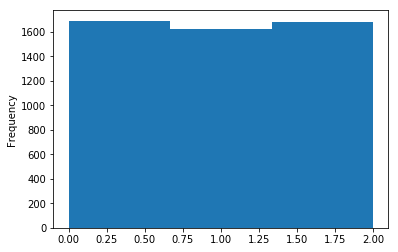

In [9]:
plt.hist(Mod_3,bins=3)
plt.ylabel('Frequency')

For the mod 5 data we see that approximately half of the entries are divisible by 5. This is indicative of the density of words ending in 'E','O','T', and 'Y'

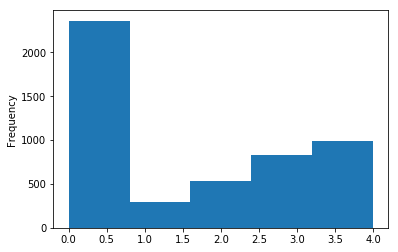

In [10]:
plt.hist(Mod_5,bins=5)
plt.ylabel('Frequency')